# 9. Application of the ML algorithm

In [1]:
# from apply_LSTM_to_past.py

In [2]:
#!/usr/bin/env python
# coding: utf-8


'''Apply GLOBAL trained ML algorithm (on 2011-2019) to the 2000-2010 period

Save PCA prediction
'''

from src.modelling import sit_corrected
from src.utils import reload_config
from src.data_preparation import mdl_dataset


from src.modelling import super_model_ml

from src.modelling import super_model_dl
from src.modelling import model_cnn
from src.modelling import model_lstm
# from src.modelling import model_autokeras

from src.utils import tardisml_utils
rootdir = tardisml_utils.get_rootdir()

# ---------------------------
# Parameters for application:
# ---------------------------

irootdir= f'{rootdir}'
#ipath = 'Leo/results/cnn_221214-131355/'
ipath = 'Leo/results/rf_221229-171734/'
ml_name ='RF'

irootdir= f'{rootdir}'
# ipath = 'Leo/results/xgb_221221-023342/'
ipath = 'Leo/results/xgb_221230-121451/'  # config updated
ml_name ='XGB'

irootdir= f'{rootdir}'
# ipath = 'Leo/results/lstm_230201-112355/'
# ipath = 'Leo/results/lstm_230215-010148/'
ipath = 'Leo/results/lstm_230523-163358/'
ipath = 'Leo/results/lstm_230919-170402/'

ipath = 'Leo/results/lstm_231005-151847/'  # default (=with SIT bias)
ipath = 'Leo/results/lstm_231006-185645/'  # 24 PCA

ipath = 'Leo/results/lstm_231212-183758/'  # var4


ipath = 'Leo/results/lstm_240404-151813/'  # diff inputs for each PC
ipath = 'Leo/results/lstm_240404-171920/'  # diff inputs for each PC + adjSIC

ipath = 'Leo/results/lstm_240405-180331/'  # adjSIC full opti1
# ipath = 'Leo/results/lstm_240405-180337/'  # adjSIC full opti1 unclear

ml_name ='LSTM'

2024-05-03 14:44:14.191531: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-03 14:44:14.347633: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /LUMI_CONTAINER/env1/lib:/LUMI_CONTAINER/env1/lib64:/opt/cray/pe/papi/7.0.1.1/lib64:/opt/cray/libfabric/1.15.2.0/lib64:/.singularity.d/libs
2024-05-03 14:44:14.347670: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-03 14:44:15.297865: W tensorflow/compiler/xla/stream_executor/platform/default

In [3]:
# ---------------------------
#        Load config file
# ---------------------------

file_config = f'{irootdir}{ipath}'

conf = reload_config.Config(file_config, verbose=1)

# ----------------------------
#    Additional parameters 
# ----------------------------

retrained = True

if retrained:
    dir_weights = f'{irootdir}{ipath}ml/retrained/'
else:
    dir_weights = f'{irootdir}{ipath}ml/'
    

Config file found: /scratch/project_465000269/edelleo1/Leo/results/lstm_240405-180331/config_default_2023_adjSIC_full-opti1.yaml
Config file updated 'needpast': /scratch/project_465000269/edelleo1/Leo/results/lstm_240405-180331/config_default_2023_adjSIC_full-opti1.yaml
Config file updated 'needfutur': /scratch/project_465000269/edelleo1/Leo/results/lstm_240405-180331/config_default_2023_adjSIC_full-opti1.yaml


In [6]:
# ---------------------------
# Import dataset 2000-2010
# ---------------------------


ds = mdl_dataset.Dataset(conf, setup=conf.setup, objective='apply', non_assimilated=conf.non_ass)
    


Initialisation dataset...
History loaded from config file: /scratch/project_465000269/edelleo1/Leo/results/lstm_240405-180331/config_default_2023_adjSIC_full-opti1.yaml
Loading data...

> Bias not loaded because dataset is used for application.

	Loading sia...
	Retrieve siconc
	Retrieve sisnthick
	Retrieve zos
	Retrieve vxsi
	Retrieve vysi
Scaling...
	Scalers loaded from /scratch/project_465000269/edelleo1/Leo/results/lstm_240405-180331/ml/scalers.pkl
Dataset Format for lstm
Config file updated 'needfutur': /scratch/project_465000269/edelleo1/Leo/results/lstm_240405-180331/config_default_2023_adjSIC_full-opti1.yaml
Config file updated 'needpast': /scratch/project_465000269/edelleo1/Leo/results/lstm_240405-180331/config_default_2023_adjSIC_full-opti1.yaml
Dataset formatted from (4445, 392) to (4325, 7, 392) for H=[-60, -30, -7, 0, 7, 30, 60].
Config file updated 'ntest': /scratch/project_465000269/edelleo1/Leo/results/lstm_240405-180331/config_default_2023_adjSIC_full-opti1.yaml
Numbe

In [5]:
ds.chrono

date
60   1991-11-30
61   1991-12-01
62   1991-12-02
63   1991-12-03
64   1991-12-04
...         ...
2674 1999-01-26
2675 1999-01-27
2676 1999-01-28
2677 1999-01-29
2678 1999-01-30

[2619 rows x 1 columns]

In [7]:
ds.chrono

date
60   1998-11-30
61   1998-12-01
62   1998-12-02
63   1998-12-03
64   1998-12-04
...         ...
4500 2011-01-26
4501 2011-01-27
4502 2011-01-28
4503 2011-01-29
4504 2011-01-30

[4445 rows x 1 columns]

In [ ]:
# ---------------------------
#      Import model ML
# ---------------------------
    
# to put in clean code
ds.ntrain = ds.config.ntrain
ds.nval = ds.config.nval
ds.ntest = ds.config.ntest
# ds.dataset.non_assimilated = ds.charac['non_ass']
   

#            m1 = model_lstm.ModelLSTM(ds, timesteps=ds.dataset['X'].shape[1], features=ds.dataset['X'].shape[2])
m1 = model_lstm.ModelLSTM(ds, timesteps=ds.dataset['X'].shape[1], features=ds.nfeatures)

# compile same architecture as during training
m1.compile_models(npca=conf.n_comp['tp'])
ifolder_pattern = f"model_weights_{conf.ml_name}_{conf.n_comp['tp']}N"  # 8 from config file

# load weights
m1.load_model_weights(ipath=f'{dir_weights}', ifolder_pattern=ifolder_pattern)

    
# apply the algorithm
m1.predict_apply()  # dataset=ds.dataset

m1.rootdir = conf.rootdir
m1.ml_dir = conf.ml_dir
m1.save_prediction()
    

# ---------------------------
# ---------------------------

# plot PCA prediction
# from src.visualization import mdl_ypred_PCA
# mdl_ypred_PCA.draw_apply(m1)  # or m2
    
    
    
    
# Reconstruct SIT from predictin (.nc)
# ifile = '/cluster/work/users/leoede/Leo/results/cnn_230131-175505/'
# rootdir = conf.rootdir
# pca_dir = conf.pca_dir

# s0 = sit_corrected.SITCorrected(ifile, name='CNN', verbose=1, objective='apply')
# s0.reconstruct_sit()
# s0.compute_mean()
# s0.sit[365].plot(vmin=0, vmax=5)

# _________________________________________________________________

In [ ]:
# Old code: apply_global_ml_to_2000_2010.py

In [1]:
#!/usr/bin/env python
# coding: utf-8


'''Apply GLOBAL trained ML algorithm (on 2011-2019) to the 2000-2010 period

Save PCA prediction
'''

from src.modelling import sit_corrected
from src.utils import reload_config
from src.data_preparation import mdl_dataset


from src.modelling import super_model_ml

from src.modelling import super_model_dl
from src.modelling import model_cnn
from src.modelling import model_lstm
# from src.modelling import model_autokeras

from src.utils import tardisml_utils
rootdir = tardisml_utils.get_rootdir()

2024-01-30 17:01:36.638372: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
# ---------------------------
# parameters for application:
# ---------------------------


irootdir= f'{rootdir}'
#ipath = 'Leo/results/cnn_221214-131355/'
ipath = 'Leo/results/rf_221229-171734/'
ml_name ='RF'

irootdir= f'{rootdir}'
# ipath = 'Leo/results/xgb_221221-023342/'
ipath = 'Leo/results/xgb_221230-121451/'  # config updated
ml_name ='XGB'

irootdir= f'{rootdir}'
# ipath = 'Leo/results/lstm_230201-112355/'
# ipath = 'Leo/results/lstm_230215-010148/'
ipath = 'Leo/results/lstm_230523-163358/'
ipath = 'Leo/results/lstm_230919-170402/'

ipath = 'Leo/results/lstm_231005-151847/'  # default (=with SIT bias)
ipath = 'Leo/results/lstm_231006-185645/'  # 24 PCA

ipath = 'Leo/results/lstm_231212-183758/'  # var4



ipath = 'Leo/results/lstm_240130-154102/'  # epoch optimal




ml_name ='LSTM'

# irootdir= f'{rootdir}'
# ipath = 'Leo/results/cnn_230131-175505/'  # saving models weights
# ml_name ='CNN'

# irootdir= f'{rootdir}'
# ipath = 'Leo/results/ak_230215-144514/'  # saving models
# ml_name ='AK'

# HOW DOES AK KNOW THE ARCHITECTURE ?

In [3]:
# ---------------------------
# Load config file
# ---------------------------

file_config = f'{irootdir}{ipath}'

conf = reload_config.Config(file_config, verbose=1)

Config file found: /scratch/project_465000269/edelleo1/Leo/results/lstm_240130-154102/config_default_2023_EPO.yaml


In [4]:
# ---------------------------
# Import dataset 2000-2010
# ---------------------------

# for ml
if ml_name == 'RF' or ml_name == 'XGB' or ml_name == 'AK':
    ds = mdl_dataset.Dataset(conf, setup=conf.setup, objective='apply')


# for dl
# cnn / lstm
else:
#     ds = mdl_dataset.Dataset(conf, setup=conf.setup, objective='apply91', non_assimilated='freerun',
#                              history=new_hist, var_to_keep=var_to_keep)
    ds = mdl_dataset.Dataset(conf, setup=conf.setup, objective='apply', non_assimilated=conf.non_ass)

# import pdb; pdb.set_trace()
    


Initialisation dataset...
History loaded from config file: /scratch/project_465000269/edelleo1/Leo/results/lstm_240130-154102/config_default_2023_EPO.yaml
Loading data...

> Bias not loaded because dataset is used for application.

	Loading sia...
	Retrieve siconc
	Retrieve sisnthick
	Retrieve zos
	Retrieve vxsi
	Retrieve vysi
Scaling...
	Scalers loaded from /scratch/project_465000269/edelleo1/Leo/results/lstm_240130-154102/ml/scalers.pkl
Dataset Format for lstm
Config file updated 'needfutur': /scratch/project_465000269/edelleo1/Leo/results/lstm_240130-154102/config_default_2023_EPO.yaml
Config file updated 'needpast': /scratch/project_465000269/edelleo1/Leo/results/lstm_240130-154102/config_default_2023_EPO.yaml
Dataset formatted from (4543, 224) to (4522, 4, 224) for H=[0, 7, 14, 21].
Config file updated 'ntest': /scratch/project_465000269/edelleo1/Leo/results/lstm_240130-154102/config_default_2023_EPO.yaml


In [5]:
# ---------------------------
#      Import model ML
# ---------------------------
    
# to put in clean code
ds.ntrain = ds.config.ntrain
ds.nval = ds.config.nval
ds.ntest = ds.config.ntest
# ds.dataset.non_assimilated = ds.charac['non_ass']

    # if dl
if conf.ml_model in super_model_dl.models:
    print('use super dl')


    
    # need to get the correct algo to compile and load
    if ml_name != 'AK':
        if ml_name == 'CNN':
            m1 = model_cnn.ModelCNN(ds, timesteps=ds.dataset['X'].shape[1], features=ds.dataset['X'].shape[2])  # , reg=reg)
        # m1.npca = conf.n_comp['tp']
        # m1.load_model(ipath=f'{irootdir}{ipath}ml/', ifolder_pattern=ifolder_pattern)

        elif ml_name == 'LSTM':
            m1 = model_lstm.ModelLSTM(ds, timesteps=ds.dataset['X'].shape[1], features=ds.dataset['X'].shape[2])


        # compile same architecture as during training
        m1.compile_models(npca=conf.n_comp['tp'])
        ifolder_pattern = f"model_weights_{conf.ml_name}_{conf.n_comp['tp']}N"  # 8 from config file

        # load weights
        m1.load_model_weights(ipath=f'{irootdir}{ipath}ml/', ifolder_pattern=ifolder_pattern)

    # load model saved with autokeras (no custom object)
    elif ml_name == 'AK':
        m1 = model_autokeras.ModelAK(ds, rootdir=conf.rootdir, ml_dir=conf.ml_dir, fig_dir=conf.fig_dir)
        m1.npca = conf.n_comp['tp']

        path = f'{rootdir}{ipath}/ml/'
        ifolder_pattern = 'model_AK_8N'
        m1.load_model(ipath=f'{path}', ifolder_pattern=ifolder_pattern)
    
        # m1.point = None  # because of 'applylocal' >>
        # print('Clean that confusion between local_apply and global_apply')
        # >>> update: now check that the dataset is 'local' to attribute the point, otherwise skip
        # should be good but has not been tested
    
    
    # apply the algorithm
    m1.predict_apply(dataset=ds.dataset)

    m1.rootdir = conf.rootdir
    m1.ml_dir = conf.ml_dir
    m1.save_prediction()
    
    
if conf.ml_model in super_model_ml.models:
    print('use super ml')

    ifile = f'{irootdir}{ipath}ml/{ml_name.lower()}_param_todo.save'
    
    m2 = super_model_ml.SModelML(ds, 'simple', None)

    m2.load_model(ifile=ifile)
    m2.type = ml_name.lower()
    
    m2.call_prediction(X=ds.dataset['X'], y=None)
    
    m2.save_prediction()
    

use super dl
ML Architecture selected: LSTM3_bk
	 << Caution: inputs may change depending on model >>


2024-01-30 17:00:24.988549: E tensorflow/compiler/xla/stream_executor/rocm/rocm_driver.cc:302] failed call to hipInit: HIP_ERROR_InvalidDevice
2024-01-30 17:00:24.988593: I tensorflow/compiler/xla/stream_executor/rocm/rocm_diagnostics.cc:112] retrieving ROCM diagnostic information for host: uan04
2024-01-30 17:00:24.988610: I tensorflow/compiler/xla/stream_executor/rocm/rocm_diagnostics.cc:119] hostname: uan04
2024-01-30 17:00:24.988744: I tensorflow/compiler/xla/stream_executor/rocm/rocm_diagnostics.cc:142] librocm reported version is: NOT_FOUND: was unable to find librocm.so DSO loaded into this program
2024-01-30 17:00:24.988762: I tensorflow/compiler/xla/stream_executor/rocm/rocm_diagnostics.cc:146] kernel reported version is: UNIMPLEMENTED: kernel reported driver version not implemented
2024-01-30 17:00:24.989042: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instru

Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Loading models...
Loaded: /scratch/project_465000269/edelleo1/Leo/results/lstm_240130-154102/ml/model_weights_LSTM3_bk_8N_PC0


2024-01-30 17:00:30.884800: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:30.887880: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:30.889644: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


Loaded: /scratch/project_465000269/edelleo1/Leo/results/lstm_240130-154102/ml/model_weights_LSTM3_bk_8N_PC1
Loaded: /scratch/project_465000269/edelleo1/Leo/results/lstm_240130-154102/ml/model_weights_LSTM3_bk_8N_PC2
Loaded: /scratch/project_465000269/edelleo1/Leo/results/lstm_240130-154102/ml/model_weights_LSTM3_bk_8N_PC3
Loaded: /scratch/project_465000269/edelleo1/Leo/results/lstm_240130-154102/ml/model_weights_LSTM3_bk_8N_PC4
Loaded: /scratch/project_465000269/edelleo1/Leo/results/lstm_240130-154102/ml/model_weights_LSTM3_bk_8N_PC5
Loaded: /scratch/project_465000269/edelleo1/Leo/results/lstm_240130-154102/ml/model_weights_LSTM3_bk_8N_PC6
Loaded: /scratch/project_465000269/edelleo1/Leo/results/lstm_240130-154102/ml/model_weights_LSTM3_bk_8N_PC7


2024-01-30 17:00:31.300606: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:31.302336: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:31.313861: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:31.315890: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:31.335854: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:31.338171: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:31.339736: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:31.341874: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:31.351630: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:31

  1/142 [..............................] - ETA: 3:46

2024-01-30 17:00:32.785771: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:32.850154: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:32.913140: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:32.968776: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


142/142 [==============================] - 2s 3ms/step


2024-01-30 17:00:33.471513: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:33.473344: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:33.534601: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:33.539623: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:33.541003: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:33.542340: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:33.550130: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:33.618504: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:33.636484: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:33

  1/142 [..............................] - ETA: 3:50

2024-01-30 17:00:35.102373: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:35.161901: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:35.220781: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:35.281284: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


142/142 [==============================] - 2s 3ms/step


2024-01-30 17:00:35.891501: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:35.908310: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:35.917675: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:35.968502: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:35.977794: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:35.983622: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:37.470982: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:37.529358: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:37.588396: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:37

142/142 [==============================] - 2s 3ms/step


2024-01-30 17:00:38.264783: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:38.281401: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:38.291045: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:38.342659: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:38.352060: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:38.357928: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


  1/142 [..............................] - ETA: 3:10

2024-01-30 17:00:39.469147: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:39.525506: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:39.582831: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:39.641788: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


142/142 [==============================] - 2s 3ms/step


2024-01-30 17:00:40.239829: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:40.256919: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:40.266432: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:40.321708: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:40.331201: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:40.337120: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


  1/142 [..............................] - ETA: 3:11

2024-01-30 17:00:41.434740: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:41.490717: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:41.559078: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:41.624579: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


142/142 [==============================] - 2s 3ms/step


2024-01-30 17:00:42.208575: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:42.225404: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:42.234835: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:42.288118: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:42.297507: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:42.303481: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


  1/142 [..............................] - ETA: 2:53

2024-01-30 17:00:43.302998: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:43.356605: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:43.409901: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:43.467347: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


142/142 [==============================] - 2s 3ms/step


2024-01-30 17:00:44.030161: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:44.046701: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:44.055954: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:44.104698: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:44.114014: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:44.119875: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


  1/142 [..............................] - ETA: 3:21

2024-01-30 17:00:45.320421: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:45.375259: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:45.429266: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:45.483333: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


142/142 [==============================] - 2s 3ms/step


2024-01-30 17:00:46.087741: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:46.104544: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:46.114037: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:46.164263: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:46.173645: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:46.179545: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


  1/142 [..............................] - ETA: 3:21

2024-01-30 17:00:47.382029: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:47.436858: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:47.489285: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2024-01-30 17:00:47.541596: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


142/142 [==============================] - 2s 3ms/step
Save prediction as .nc
Ytrue saved as: /scratch/project_465000269/edelleo1/Leo/results/lstm_240130-154102/ml/ypred_LSTM3_bk_1998_2011_Freerun.nc


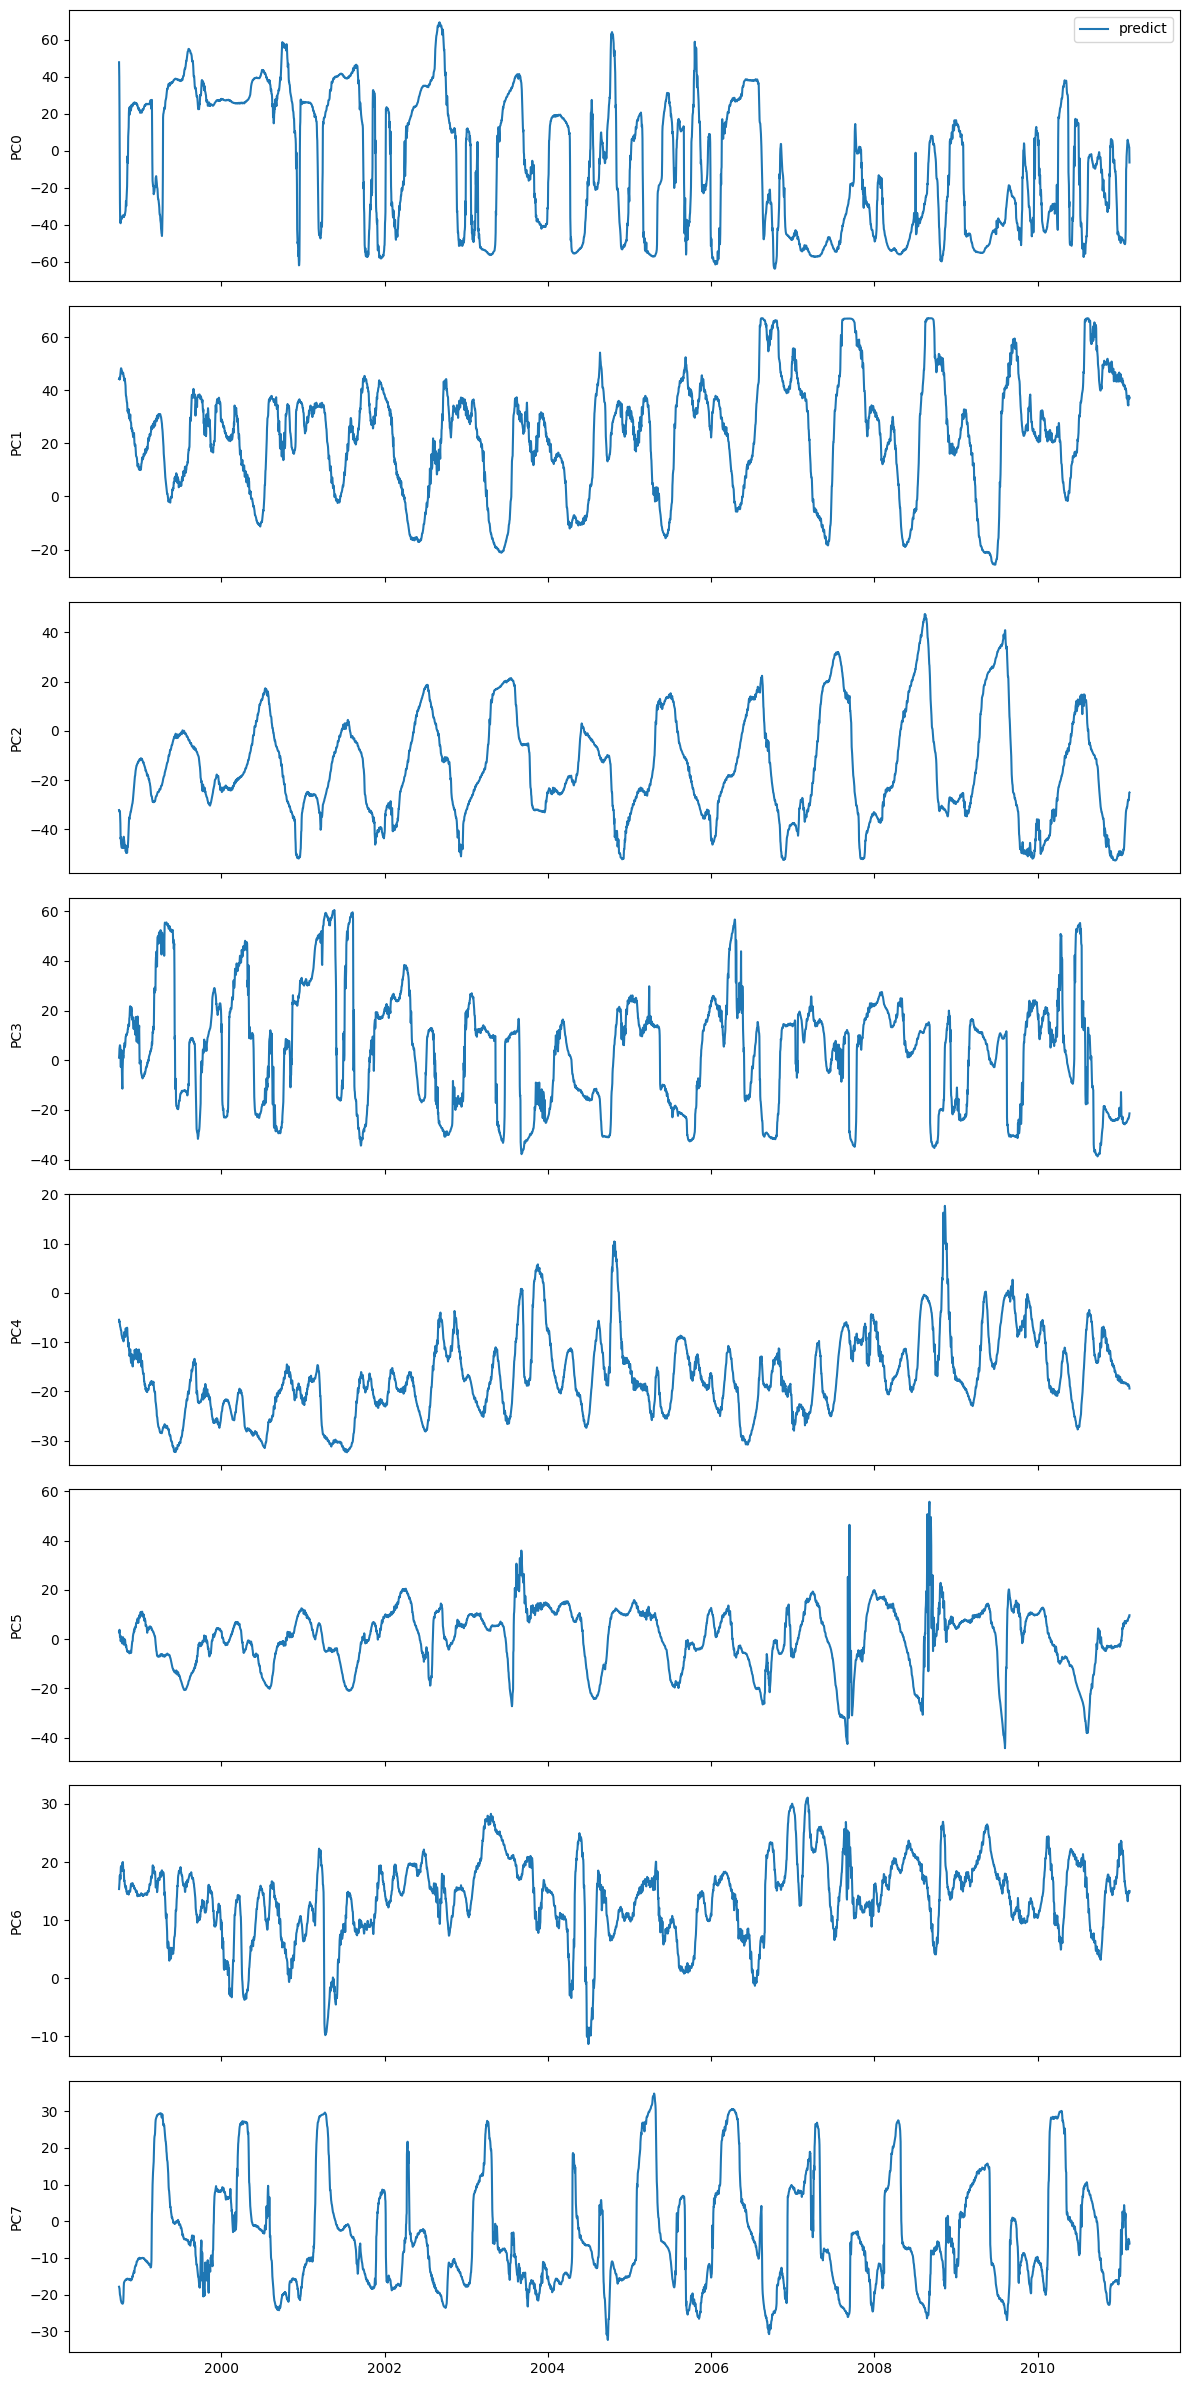

In [6]:
# plot PCA prediction
from src.visualization import mdl_ypred_PCA
mdl_ypred_PCA.draw_apply(m1)  # or m2
    
    
    
    

In [6]:
m1.save_prediction()

Save prediction as .nc
Ytrue saved as: /scratch/project_465000269/edelleo1/Leo/results/lstm_240130-154102/ml/ypred_LSTM3_bk_1991_1999_Freerun.nc


In [12]:
# Reconstruct SIT from predictin (.nc)

irootdir = rootdir
ipath = 'Leo/results/lstm_240130-154102/'
ifile = f"{irootdir}{ipath}"


s0 = sit_corrected.SITCorrected(ifile, name='LSTM', verbose=1, objective='apply')
s0.reconstruct_sit()
s0.compute_mean()
# s0.sit[365].plot(vmin=0, vmax=5)

Config file found: /scratch/project_465000269/edelleo1/Leo/results/lstm_240130-154102/config_default_2023_EPO.yaml
Folder: Leo/results/lstm_240130-154102/figures/sit_reconstruct/

Initialisation SIT from LSTM
ML prediction .nc file found: /scratch/project_465000269/edelleo1/Leo/results/lstm_240130-154102/ml/ypred_LSTM3_bk_1998_2011_Freerun.nc


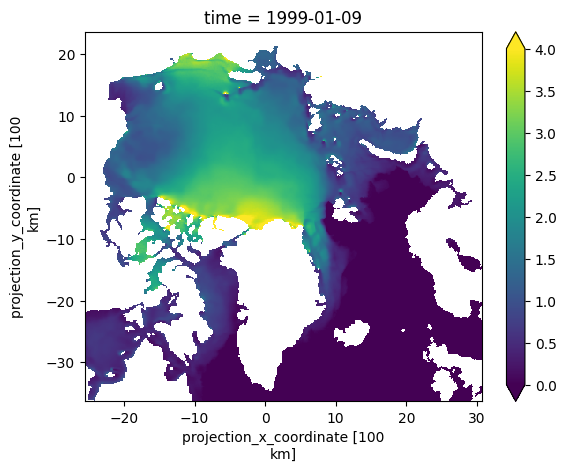

In [13]:
s0.sit.isel(time=100).plot(vmin=0, vmax=4)

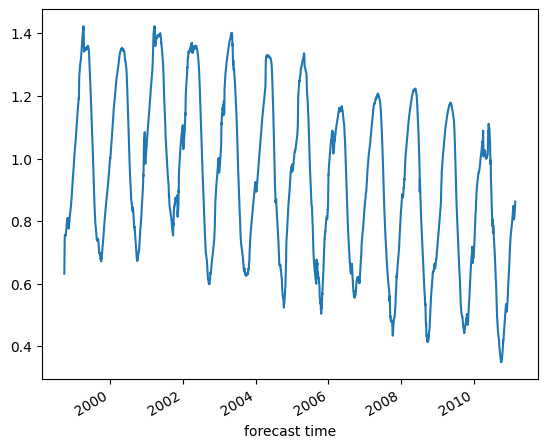

In [14]:
s0.sit.mean(('x','y')).plot()

# ----------------------------------------------------------------------

# Draft for /pyroutine/apply_global_to_2000_2010.py

In [1]:
from src.utils import reload_config
from src.data_preparation import mdl_dataset

In [2]:
import src.utils.tardisml_utils as tardisml_utils
rootdir = tardisml_utils.get_rootdir()

In [7]:
## parameters for application:

irootdir= f'{rootdir}'
ipath = 'Leo/results/cnn_230131-175505/'  # saving models weights
ml_name ='CNN'

file_config = f'{irootdir}{ipath}'

In [3]:
## parameters for application:

irootdir= f'{rootdir}'
ipath = 'Leo/results/lstm_230201-112355/'
ml_name ='LSTM'

file_config = f'{irootdir}{ipath}'

In [5]:
## parameters for application:

irootdir= f'{rootdir}'
ipath = 'Leo/results/ak_230215-144514/'  # saving models weights
ml_name ='AK'

file_config = f'{irootdir}{ipath}'

In [2]:
# parameters for application:

irootdir= f'{rootdir}'
#ipath = 'Leo/results/cnn_221214-131355/'
ipath = 'Leo/results/rf_221229-171734/'
ml_name ='RF'

file_config = f'{irootdir}{ipath}'

In [6]:
# parameters for application:

irootdir= f'{rootdir}' # /cluster/work/users/leoede/'
# ipath = 'Leo/results/xgb_221221-023342/'
ipath = 'Leo/results/xgb_221230-121451/'  # config updated
ml_name ='XGB'

file_config = f'{irootdir}{ipath}'

In [4]:
## parameters for application:

irootdir= f'{rootdir}'
ipath = 'Leo/results/lstm_230919-170402/'
ml_name ='LSTM'

file_config = f'{irootdir}{ipath}'

In [5]:
conf = reload_config.Config(file_config, verbose=1)

Config file found: /scratch/project_465000269/edelleo1/Leo/results/lstm_230919-170402/config_default_2023_fast.yaml


--------------------

## Import dataset 2000-2010 with data from Freerun

In [12]:
from src.data_preparation import load_data

In [71]:
from importlib import reload
reload(mdl_dataset);

In [72]:
reload(load_data)

<module 'src.data_preparation.load_data' from '/users/edelleo1/tardis/tardis-ml/src/data_preparation/load_data.py'>

In [73]:
# cnn / lstm
ds = mdl_dataset.Dataset(conf, setup=conf.setup, objective='apply91', 
                         non_assimilated='freerun')


Initialisation dataset...
History loaded from config file: /scratch/project_465000269/edelleo1/Leo/results/lstm_230919-170402/config_default_2023_fast.yaml
Loading data...
> Bias not loaded because dataset is used for application.
Loading sia...
	Retrieve siconc
	Retrieve sisnthick
	Retrieve zos
	Retrieve vxsi
	Retrieve vysi
Dataset Format for lstm
> /users/edelleo1/tardis/tardis-ml/src/data_preparation/mdl_dataset.py(785)format_for_dl()
    783         import pdb;pdb.set_trace()
    784 
--> 785         if self.config.ml_model in ['cnn', 'lstm']:
    786             mdl_dataset_format.format_CNN_LSTM(self, self.history.params['keras']['H'])
    787         elif self.config.ml_model == 'ak':

ipdb> c
Dataset formatted from (2900, 224) to (2879, 4, 224) for H=[0, 7, 14, 21].


--------------------

## Import dataset 2000-2010

In [9]:
from importlib import reload
reload(mdl_dataset);

In [7]:
# ml
ds = mdl_dataset.Dataset(conf, setup=conf.setup, objective='apply')


Initialisation dataset...
History loaded from config file: /scratch/project_465000269/edelleo1/Leo/results/ak_230215-144514/config_AK_no_bias_0wk.yaml
Loading data...
> Bias not loaded because dataset is used for application.
	Retrieve siconc
	Retrieve sisnthick
	Retrieve zos
	Retrieve vxsi
	Retrieve vysi
Dataset Format for ak
No need for formatting


In [103]:
# cnn / lstm
ds = mdl_dataset.Dataset(conf, setup=conf.setup, objective='apply', history=new_hist, var_to_keep=var_to_keep)


Initialisation dataset...
Loading data...
> Bias not loaded because dataset is used for application.
	Retrieve siconc
	Retrieve sisnthick
	Retrieve zos
	Retrieve vxsi
	Retrieve vysi
New variable selection:
  ['SITf t+0 PC0' 'SITf t+0 PC1' 'SITf t+0 PC2' 'SITf t+0 PC3'
 'SITf t+0 PC4' 'SITf t+0 PC5' 'SITf t+0 PC6' 'SITf t+0 PC7'
 'sisnthick t+0 PC0' 'sisnthick t+0 PC1' 'sisnthick t+0 PC2'
 'sisnthick t+0 PC3' '2T t+0 PC0' '2T t+0 PC1' '2T t+0 PC2' '2T t+0 PC3'
 'MSL t+0 PC0' 'MSL t+0 PC1' 'MSL t+0 PC2' 'MSL t+0 PC3' 'TP t+0 PC0'
 'TP t+0 PC1' 'TP t+0 PC2' 'TP t+0 PC3' 'siconc t+0 PC0' 'siconc t+0 PC1'
 'siconc t+0 PC2' 'siconc t+0 PC3']
Variables updated: do not forget to execute self.format_for_dl() if Deep Learning
Dataset Format for lstm
Dataset formatted from (4361, 28) to (4339, 4, 28) for H=[1, 8, 15, 22].


In [19]:
ds.dataset['X'].shape

(4229, 12, 56)

In [ ]:
# need to extract PC of 2000-2011 with PCA of 2011-2019 !
# in pyroutine/extract_forcings_2000-2010.py

In [32]:
from src.modelling import mdl_history

In [7]:
# CNN

H = [0,7,14,21,28, 35, 42, 49, 56, 63, 70, 77]

new_hist = mdl_history.History(conf)
new_hist.set_zeros()
new_hist.set_SIT_history('keras', H)

var_to_keep = ['SITf t+0', 'sisnthick t+0', '2T t+0', '2T t+8', 'MSL t+0', 'TP t+0', 'TP t+8', 'siconc t+0']

In [33]:
# LSTM

H = [1,8,15,22]

new_hist = mdl_history.History(conf)
new_hist.set_zeros()
new_hist.set_SIT_history('keras', H)

var_to_keep = ['SITf t+0', 'sisnthick t+0', '2T t+0', '2T t+8', 'MSL t+0', 'TP t+0', 'TP t+8', 'siconc t+0']

## Import model ML

### for deep learning algorithms

In [34]:
from src.modelling import super_model_dl

2023-07-28 19:27:43.762723: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [45]:
from importlib import reload

In [54]:
reload(super_model_dl)

<module 'src.modelling.super_model_dl' from '/cluster/home/leoede/tardis/tardis-ml/src/modelling/super_model_dl.py'>

In [ ]:
from src.modelling import model_cnn

In [35]:
from src.modelling import model_lstm

/LUMI_TYKKY_KyB8utx/env1/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [11]:
from src.modelling import model_autokeras

In [55]:
reload(model_cnn)

<module 'src.modelling.model_cnn' from '/cluster/home/leoede/tardis/tardis-ml/src/modelling/model_cnn.py'>

In [43]:
ds.ntrain = None
ds.ntest = None
ds.nval = None

In [37]:
ml_name

'LSTM'

In [44]:
# if dl
if conf.ml_model in super_model_dl.models:
    print('use super dl')

# from keras.regularizers import L1L2
# regularizers = [L1L2(l1=0.01, l2=0)]
# reg = regularizers[0]

    
# need to get the correct algo to compile and load
if ml_name == 'CNN':
    m1 = model_cnn.ModelCNN(ds, timesteps=ds.dataset['X'].shape[1], features=ds.dataset['X'].shape[2])  # , reg=reg)
# m1.npca = conf.n_comp['tp']
# m1.load_model(ipath=f'{irootdir}{ipath}ml/', ifolder_pattern=ifolder_pattern)

elif ml_name == 'LSTM':
    m1 = model_lstm.ModelLSTM(ds, timesteps=ds.dataset['X'].shape[1], features=ds.dataset['X'].shape[2])


use super dl


In [15]:
if ml_name == 'AK':
    # load models
    m1 = model_autokeras.ModelAK(ds, rootdir=conf.rootdir, ml_dir=conf.ml_dir, fig_dir=conf.fig_dir)

    m1.npca= 8

    path = f'{rootdir}{ipath}/ml/'
    ifolder_pattern = 'model_AK_8N'
    m1.load_model(ipath=f'{path}', ifolder_pattern=ifolder_pattern)

In [ ]:
if ml_name == 'AK':
    m1.point = None
    m1.predict_apply(dataset=ds.dataset)

137/137 [==============================] - 1s 2ms/step


In [45]:
# init name of models:
m1.compile_models(npca=conf.n_comp['tp'])

input change depending on model !!


2023-07-28 19:34:20.011921: E tensorflow/compiler/xla/stream_executor/rocm/rocm_driver.cc:302] failed call to hipInit: HIP_ERROR_InvalidDevice
2023-07-28 19:34:20.011975: I tensorflow/compiler/xla/stream_executor/rocm/rocm_diagnostics.cc:112] retrieving ROCM diagnostic information for host: uan02
2023-07-28 19:34:20.011985: I tensorflow/compiler/xla/stream_executor/rocm/rocm_diagnostics.cc:119] hostname: uan02
2023-07-28 19:34:20.012140: I tensorflow/compiler/xla/stream_executor/rocm/rocm_diagnostics.cc:142] librocm reported version is: NOT_FOUND: was unable to find librocm.so DSO loaded into this program
2023-07-28 19:34:20.012148: I tensorflow/compiler/xla/stream_executor/rocm/rocm_diagnostics.cc:146] kernel reported version is: UNIMPLEMENTED: kernel reported driver version not implemented
2023-07-28 19:34:20.012659: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instru

Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !
Compiled !


In [46]:
ifolder_pattern

NameError: name 'ifolder_pattern' is not defined

In [47]:
m1.models

{'pc0': <keras.engine.sequential.Sequential at 0x7f4f57a86610>,
 'pc1': <keras.engine.sequential.Sequential at 0x7f4f3c6f18b0>,
 'pc2': <keras.engine.sequential.Sequential at 0x7f4f3c66ec10>,
 'pc3': <keras.engine.sequential.Sequential at 0x7f4f3c468ac0>,
 'pc4': <keras.engine.sequential.Sequential at 0x7f4f3c4c89a0>,
 'pc5': <keras.engine.sequential.Sequential at 0x7f4f3c532dc0>,
 'pc6': <keras.engine.sequential.Sequential at 0x7f4f3c519a30>,
 'pc7': <keras.engine.sequential.Sequential at 0x7f4f3c324730>}

In [41]:
m1.print_summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 12, 256)           36096     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 3, 256)           0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 3, 256)            0         
                                                                 
 flatten_4 (Flatten)         (None, 768)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 769       
                                                                 
Total params: 36,865
Trainable params: 36,865
Non-trainable params: 0
__________________________________________________

 conv1d_11 (Conv1D)          (None, 12, 256)           36096     
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 3, 256)           0         
 g1D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 3, 256)            0         
                                                                 
 flatten_11 (Flatten)        (None, 768)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 769       
                                                                 
Total params: 36,865
Trainable params: 36,865
Non-trainable params: 0
_________________________________________________________________


In [48]:
conf.ml_name

'LSTM3_bk'

In [49]:
# ifolder_pattern = f"model_weights_{conf.ml_model.upper()}_{conf.n_comp['tp']}N"  # 8 from config file
ifolder_pattern = f"model_weights_{conf.ml_name}_{conf.n_comp['tp']}N"  # 8 from config file


m1.load_model_weights(ipath=f'{irootdir}{ipath}ml/', ifolder_pattern=ifolder_pattern)

# is it enough ?

Loading models...


ValueError: You are trying to restore a checkpoint from a legacy Keras optimizer into a v2.11+ Optimizer, which can cause errors. Please update the optimizer referenced in your code to be an instance of `tf.keras.optimizers.legacy.Optimizer`, e.g.: `tf.keras.optimizers.legacy.Adam`.

In [119]:
# apply the algorithm

m1.predict_apply(dataset=ds.dataset)

136/136 [==============================] - 2s 2ms/step


In [121]:
# m1.rootdir = conf.rootdir
# m1.ml_dir = conf.ml_dir

In [123]:
m1.save_prediction()

Save prediction as .nc
Ytrue saved as: /cluster/work/users/leoede/Leo/results/lstm_230201-112355/ml/ypred_LSTM3_bk_2000_2011.nc


### for machine learning algorithms

In [21]:
from src.modelling import super_model_ml

In [75]:
reload(super_model_ml)

<module 'src.modelling.super_model_ml' from '/cluster/home/leoede/tardis/tardis-ml/src/modelling/super_model_ml.py'>

In [24]:
if conf.ml_model in super_model_ml.models:
    print('use super ml')

ifile = f'{irootdir}{ipath}ml/{ml_name.lower()}_param_todo.save'

In [22]:
ds.ntrain = ds.config.ntrain
ds.nval = ds.config.nval
ds.ntest = ds.config.ntest

In [37]:
reload(super_model_ml)

<module 'src.modelling.super_model_ml' from '/cluster/home/leoede/tardis/tardis-ml/src/modelling/super_model_ml.py'>

In [23]:
m2 = super_model_ml.SModelML(ds, 'simple', None)
# m1.npca = conf.n_comp['tp']

m2.load_model(ifile=ifile)
m2.type = ml_name.lower()

NameError: name 'ifile' is not defined

In [12]:
m2.call_prediction(X=ds.dataset['X'], y=None)

## Save prediction

In [71]:
m1.save_prediction()

Save prediction as .nc
Ytrue saved as: /cluster/work/users/leoede/Leo/results/cnn_230131-175505/ml/ypred_CNN_2000_2011.nc


In [77]:
m2.save_prediction()

Saving prediction as .nc...
Ypred saved as: /cluster/work/users/leoede/Leo/results/xgb_221230-121451/ml/ypred_xgb_2000_2011.nc


## Plot

In [61]:
from src.visualization import mdl_ypred_PCA

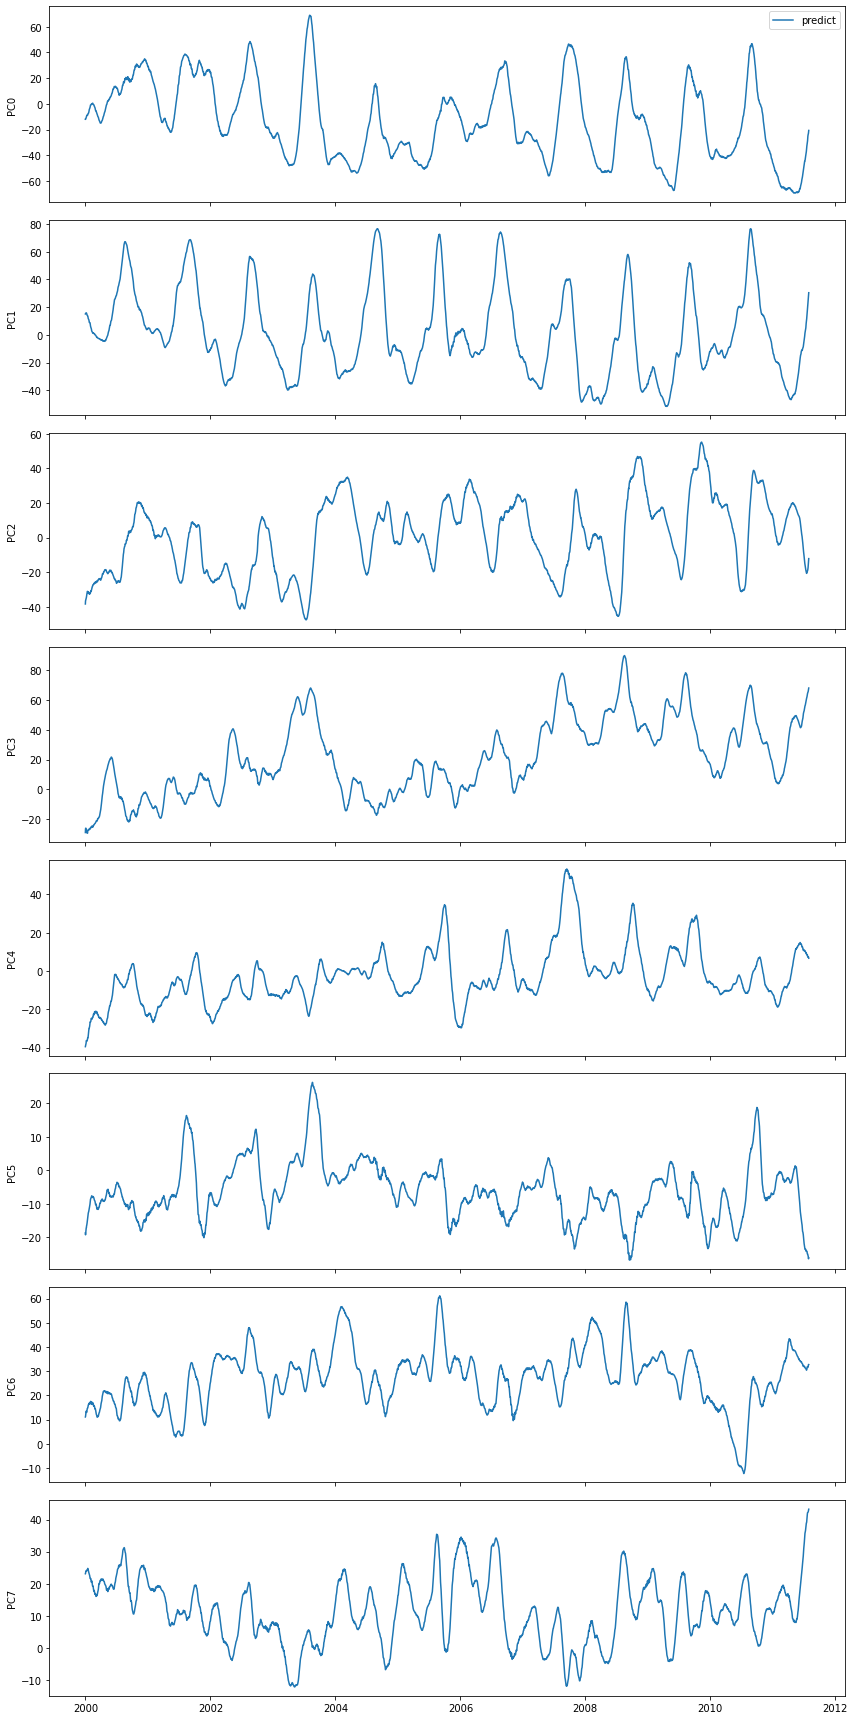

In [62]:
mdl_ypred_PCA.draw_apply(m1)

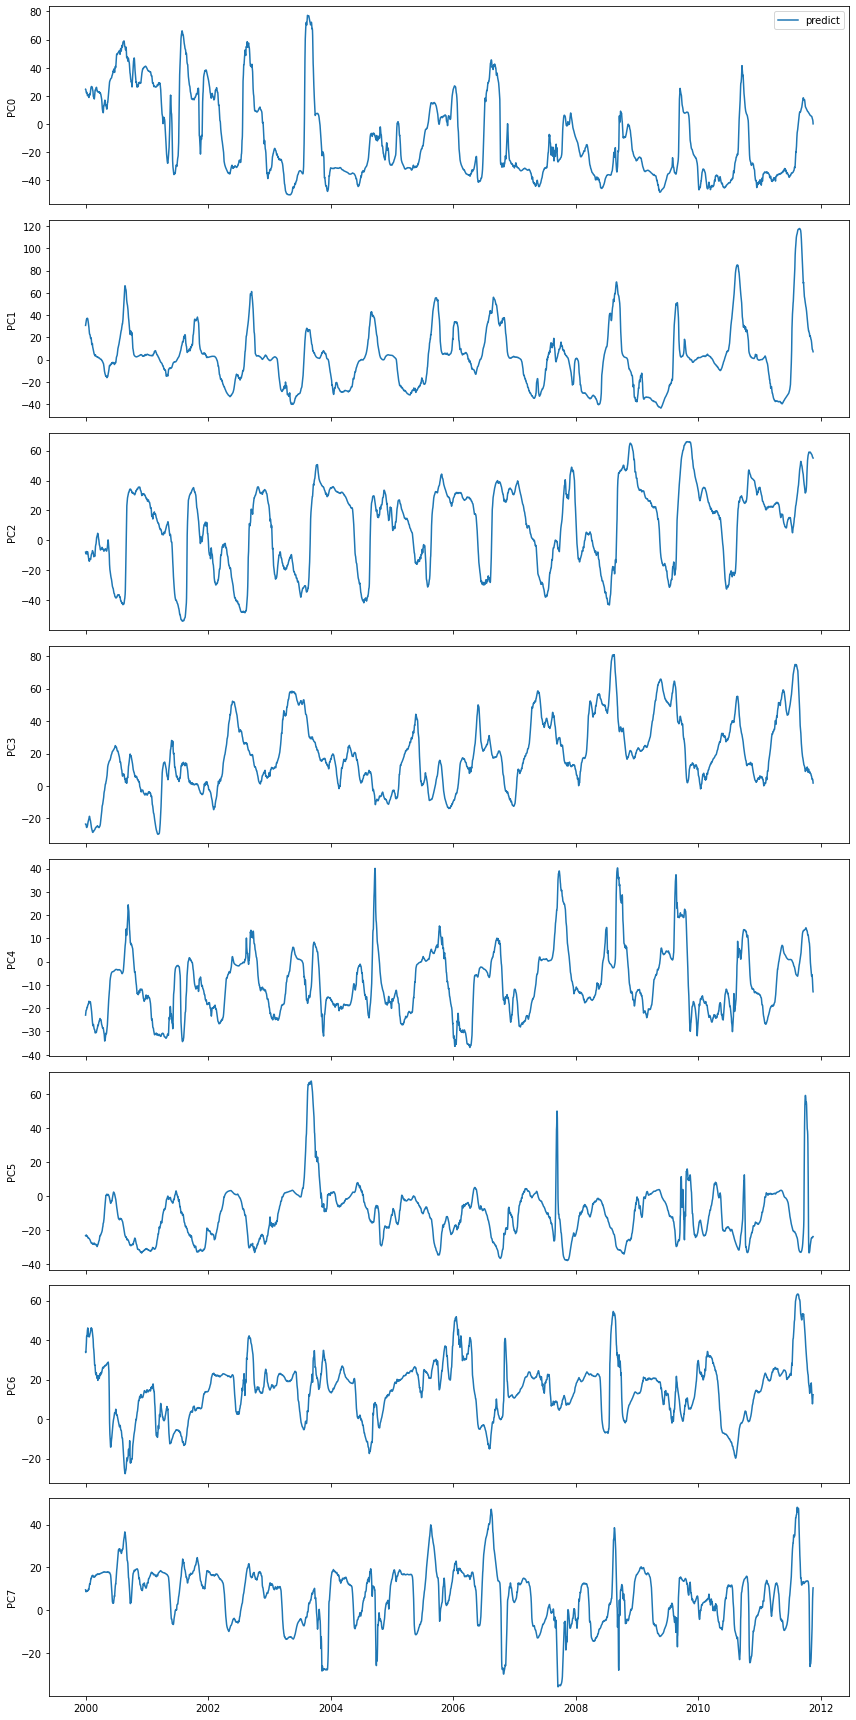

In [124]:
mdl_ypred_PCA.draw_apply(m1)

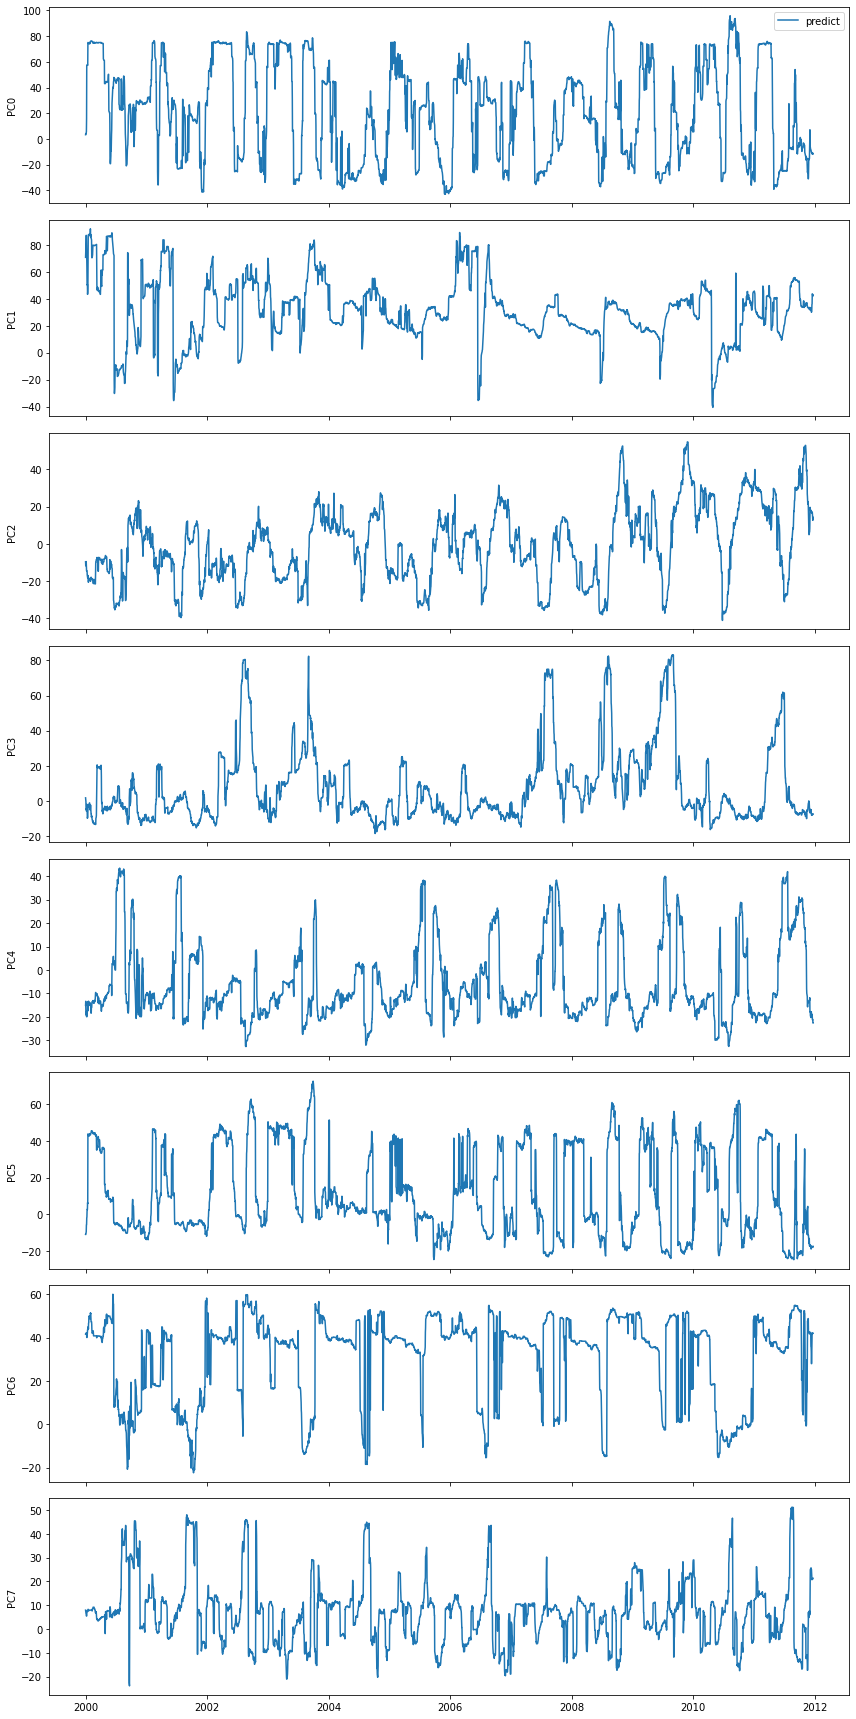

In [68]:
mdl_ypred_PCA.draw_apply(m2)

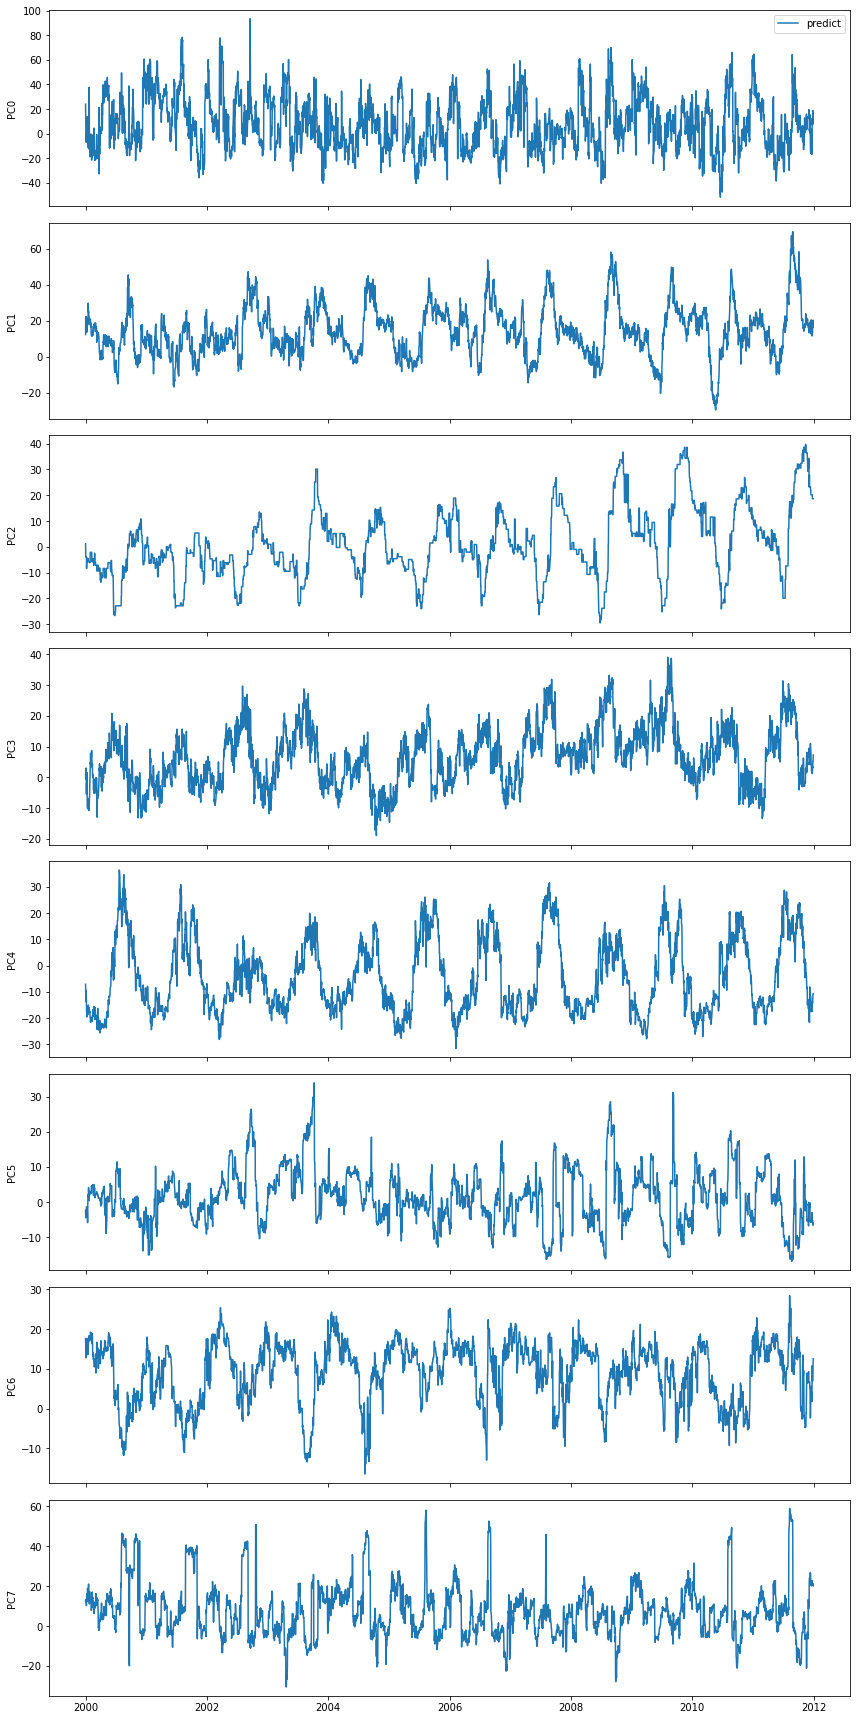

In [79]:
mdl_ypred_PCA.draw_apply(m2)

# ---------------------------------------

# ---------------------------------------

from hereonwards, plot that do not belong in 'apply_xxx.py'

# ---------------------------------------

 # Reconstruct SIT from .nc

In [13]:
ifile = f'{rootdir}Leo/results/cnn_230131-175505/'
rootdir = conf.rootdir
pca_dir = conf.pca_dir

In [14]:
s0 = sit_corrected.SITCorrected(ifile, name='CNN', verbose=1, objective='apply')

Config file found: /scratch/project_465000269/edelleo1/Leo/results/cnn_230131-175505/config_CNN_no_bias_0wk.yaml
Folder: Leo/results/cnn_230131-175505/figures/sit_reconstruct/

Initialisation SIT from CNN
ML prediction .nc file found: /scratch/project_465000269/edelleo1/Leo/results/cnn_230131-175505/ml/ypred_CNN_2000_2011.nc


In [15]:
s0.reconstruct_sit()

Ypred is NOT reversed !
todo: get ntest from config file or results file


In [22]:
s0.save_sit()

Saved as: /scratch/project_465000269/edelleo1/Leo/results/cnn_230131-175505/ml/sit_ml_2000_2011.nc


In [77]:
s0.compute_mean()

In [79]:
import  matplotlib.pyplot as plt

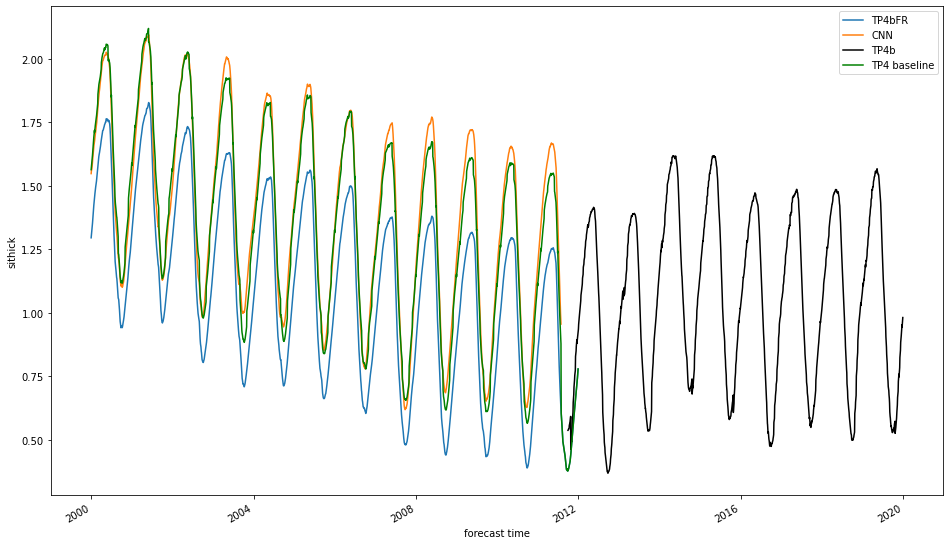

In [81]:
fig, ax = plt.subplots(figsize=(16,9))

s0.sit_nam.plot(label='TP4bFR')
s0.sit_m.plot(label='CNN')
s0.sit_am.plot(label='TP4b', color='k')
s0.sit_blm.plot(label='TP4 baseline', color='g')
plt.legend()

# -------------------

In [6]:
ifile = f'{rootdir}Leo/results/lstm_230201-112355/'
rootdir = conf.rootdir
pca_dir = conf.pca_dir

NameError: name 'conf' is not defined

In [ ]:
s3 = sit_corrected.SITCorrected(ifile, name='LSTM', verbose=1, objective='apply')

In [5]:
s3.reconstruct_sit()

NameError: name 's3' is not defined

In [128]:
s3.compute_mean()

In [22]:
s3.save_sit()

Saved as: /scratch/project_465000269/edelleo1/Leo/results/lstm_230201-112355/ml/sit_ml_2000_2011.nc


In [24]:
s3.name

'LSTM'

# -------------------

In [17]:
from importlib import reload

In [18]:
reload(sit_corrected)

<module 'src.modelling.sit_corrected' from '/users/edelleo1/tardis/tardis-ml/src/modelling/sit_corrected.py'>

In [12]:
from src.modelling import sit_corrected

In [17]:
ifile = f'{rootdir}Leo/results/rf_221229-171734/'  # ml/ypred_rf_2000_2011.nc'
rootdir = conf.rootdir
pca_dir = conf.pca_dir

In [18]:
s1 = sit_corrected.SITCorrected(ifile, name='RF', verbose=1, objective='apply')

Config file found: /scratch/project_465000269/edelleo1/Leo/results/rf_221229-171734/config_RF_no_bias_1wk.yaml
Old config files, some <ml> parameters are not imported.
Folder: Leo/results/rf_221229-171734/figures/sit_reconstruct/

Initialisation SIT from RF
ML prediction .nc file found: /scratch/project_465000269/edelleo1/Leo/results/rf_221229-171734/ml/ypred_rf_2000_2011.nc


In [19]:
s1.reconstruct_sit()

Ypred is NOT reversed !
todo: get ntest from config file or results file


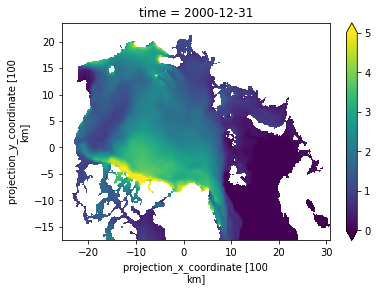

In [23]:
s1.sit[365].plot(vmin=0, vmax=5)

In [25]:
import matplotlib.pyplot as plt

In [21]:
s1.compute_mean()

In [22]:
s1.save_sit()

Saved as: /scratch/project_465000269/edelleo1/Leo/results/rf_221229-171734/ml/sit_ml_2000_2011.nc


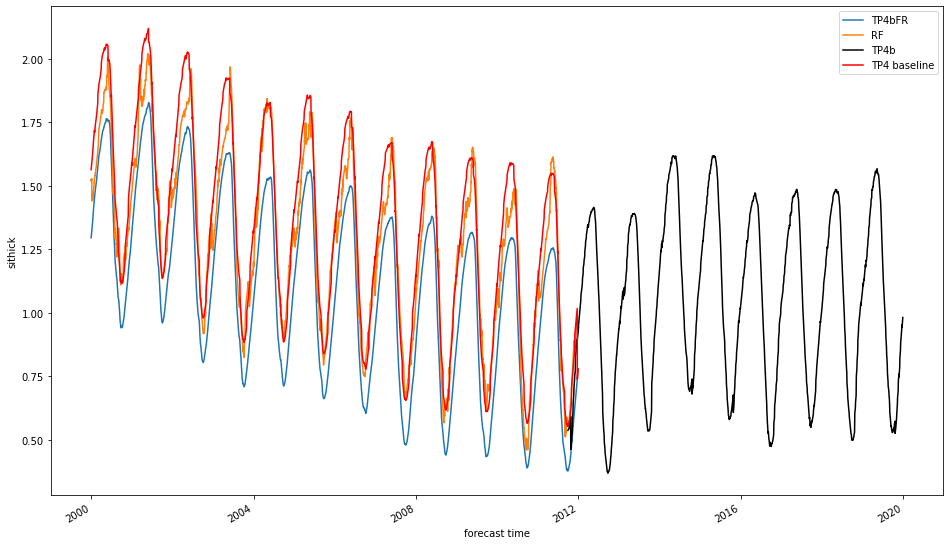

In [53]:
fig, ax = plt.subplots(figsize=(16,9))

s1.sit_nam.plot(label='TP4bFR')
s1.sit_m.plot(label='RF')
s1.sit_am.plot(label='TP4b', color='k')
s1.sit_blm.plot(label='TP4 baseline', color='r')
plt.legend()

-----------------------------------

 # Reconstruct SIT from .nc

In [8]:
ifile = f'{rootdir}Leo/results/xgb_221230-121451/'  # ml/ypred_rf_2000_2011.nc'
rootdir = conf.rootdir
pca_dir = conf.pca_dir

In [11]:
s2 = sit_corrected.SITCorrected(ifile, name='XGB', verbose=1, objective='apply')

Config file found: /scratch/project_465000269/edelleo1/Leo/results/xgb_221230-121451/config_XGB_no_bias_0wk.yaml
Old config files, some <ml> parameters are not imported.
Folder: Leo/results/xgb_221230-121451/figures/sit_reconstruct/

Initialisation SIT from XGB
ML prediction .nc file found: /scratch/project_465000269/edelleo1/Leo/results/xgb_221230-121451/ml/ypred_xgb_2000_2011.nc


In [12]:
s2.reconstruct_sit()

Ypred is NOT reversed !
todo: get ntest from config file or results file


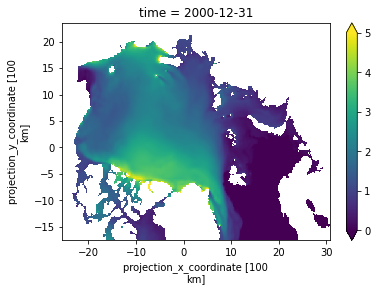

In [13]:
s2.sit[365].plot(vmin=0, vmax=5)

In [14]:
s2.save_sit()

Saved as: /scratch/project_465000269/edelleo1/Leo/results/xgb_221230-121451/ml/sit_ml_2000_2011.nc


In [90]:
s2.compute_mean()

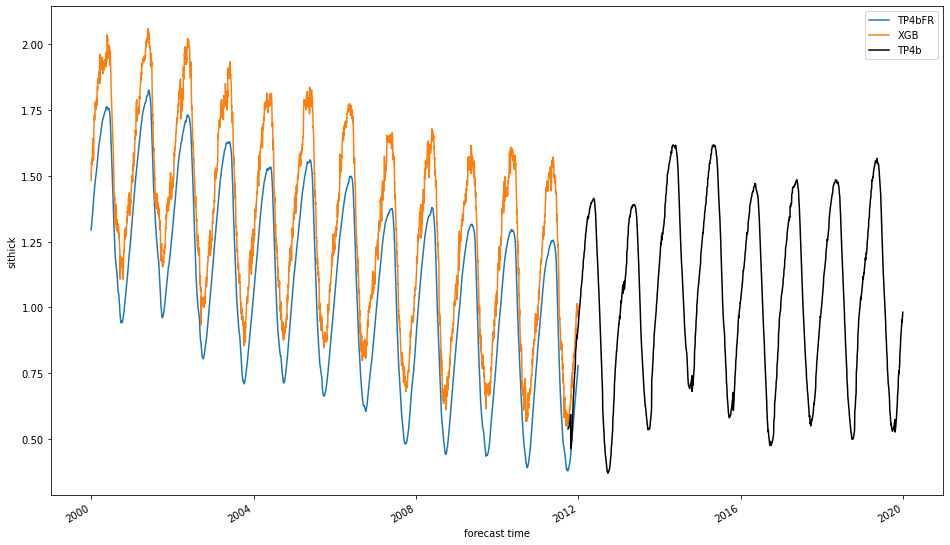

In [88]:
fig, ax = plt.subplots(figsize=(16,9))

s2.sit_nam.plot(label='TP4bFR')
s2.sit_m.plot(label='XGB')
s2.sit_am.plot(label='TP4b', color='k')
plt.legend()

-------------

In [18]:
import matplotlib.pyplot as plt

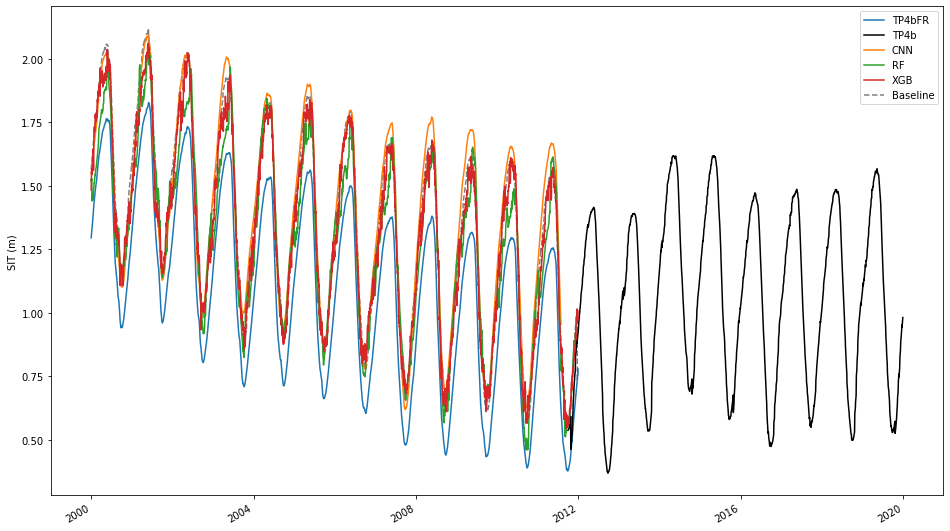

In [92]:
fig, ax = plt.subplots(figsize=(16,9))

s1.sit_nam.plot(label='TP4bFR')
s1.sit_am.plot(label='TP4b', color='k')

s0.sit_m.plot(label='CNN')
s1.sit_m.plot(label='RF')
s2.sit_m.plot(label='XGB')

# add baseline from 2013-2019 period
s1.sit_blm.plot(label='Baseline', color='grey', ls='--', zorder=-100)

plt.xlabel('')
plt.ylabel('SIT (m)')

plt.legend()

savefig=False
if savefig:
    odir = '/cluster/work/users/leoede/Leo/results/application/'
    ofile = f'SIT_2000_2020_XGB_RF.png'
    plt.savefig(f"{odir}{ofile}", dpi=200, facecolor='white')
    print(f'Saved as: {odir}{ofile}')


### test plot intercomp

In [16]:
from src.visualization import intercomp_sit

In [17]:
import datetime

In [18]:
day = datetime.datetime(2000, 1, 1)

In [133]:
models = {
    'CNN*': s0,
    'CNN': s0,
    'LSTM': s3,
    'RF': s1,
    'XGB': s2
}

In [19]:
# just to debug the plot function
models = {
    'CNN*': s0,
    'CNN': s0,
    'LSTM': s0,
    'RF': s0,
    'XGB': s0
}

In [135]:
reload(intercomp_sit)

<module 'src.visualization.intercomp_sit' from '/cluster/home/leoede/tardis/tardis-ml/src/visualization/intercomp_sit.py'>

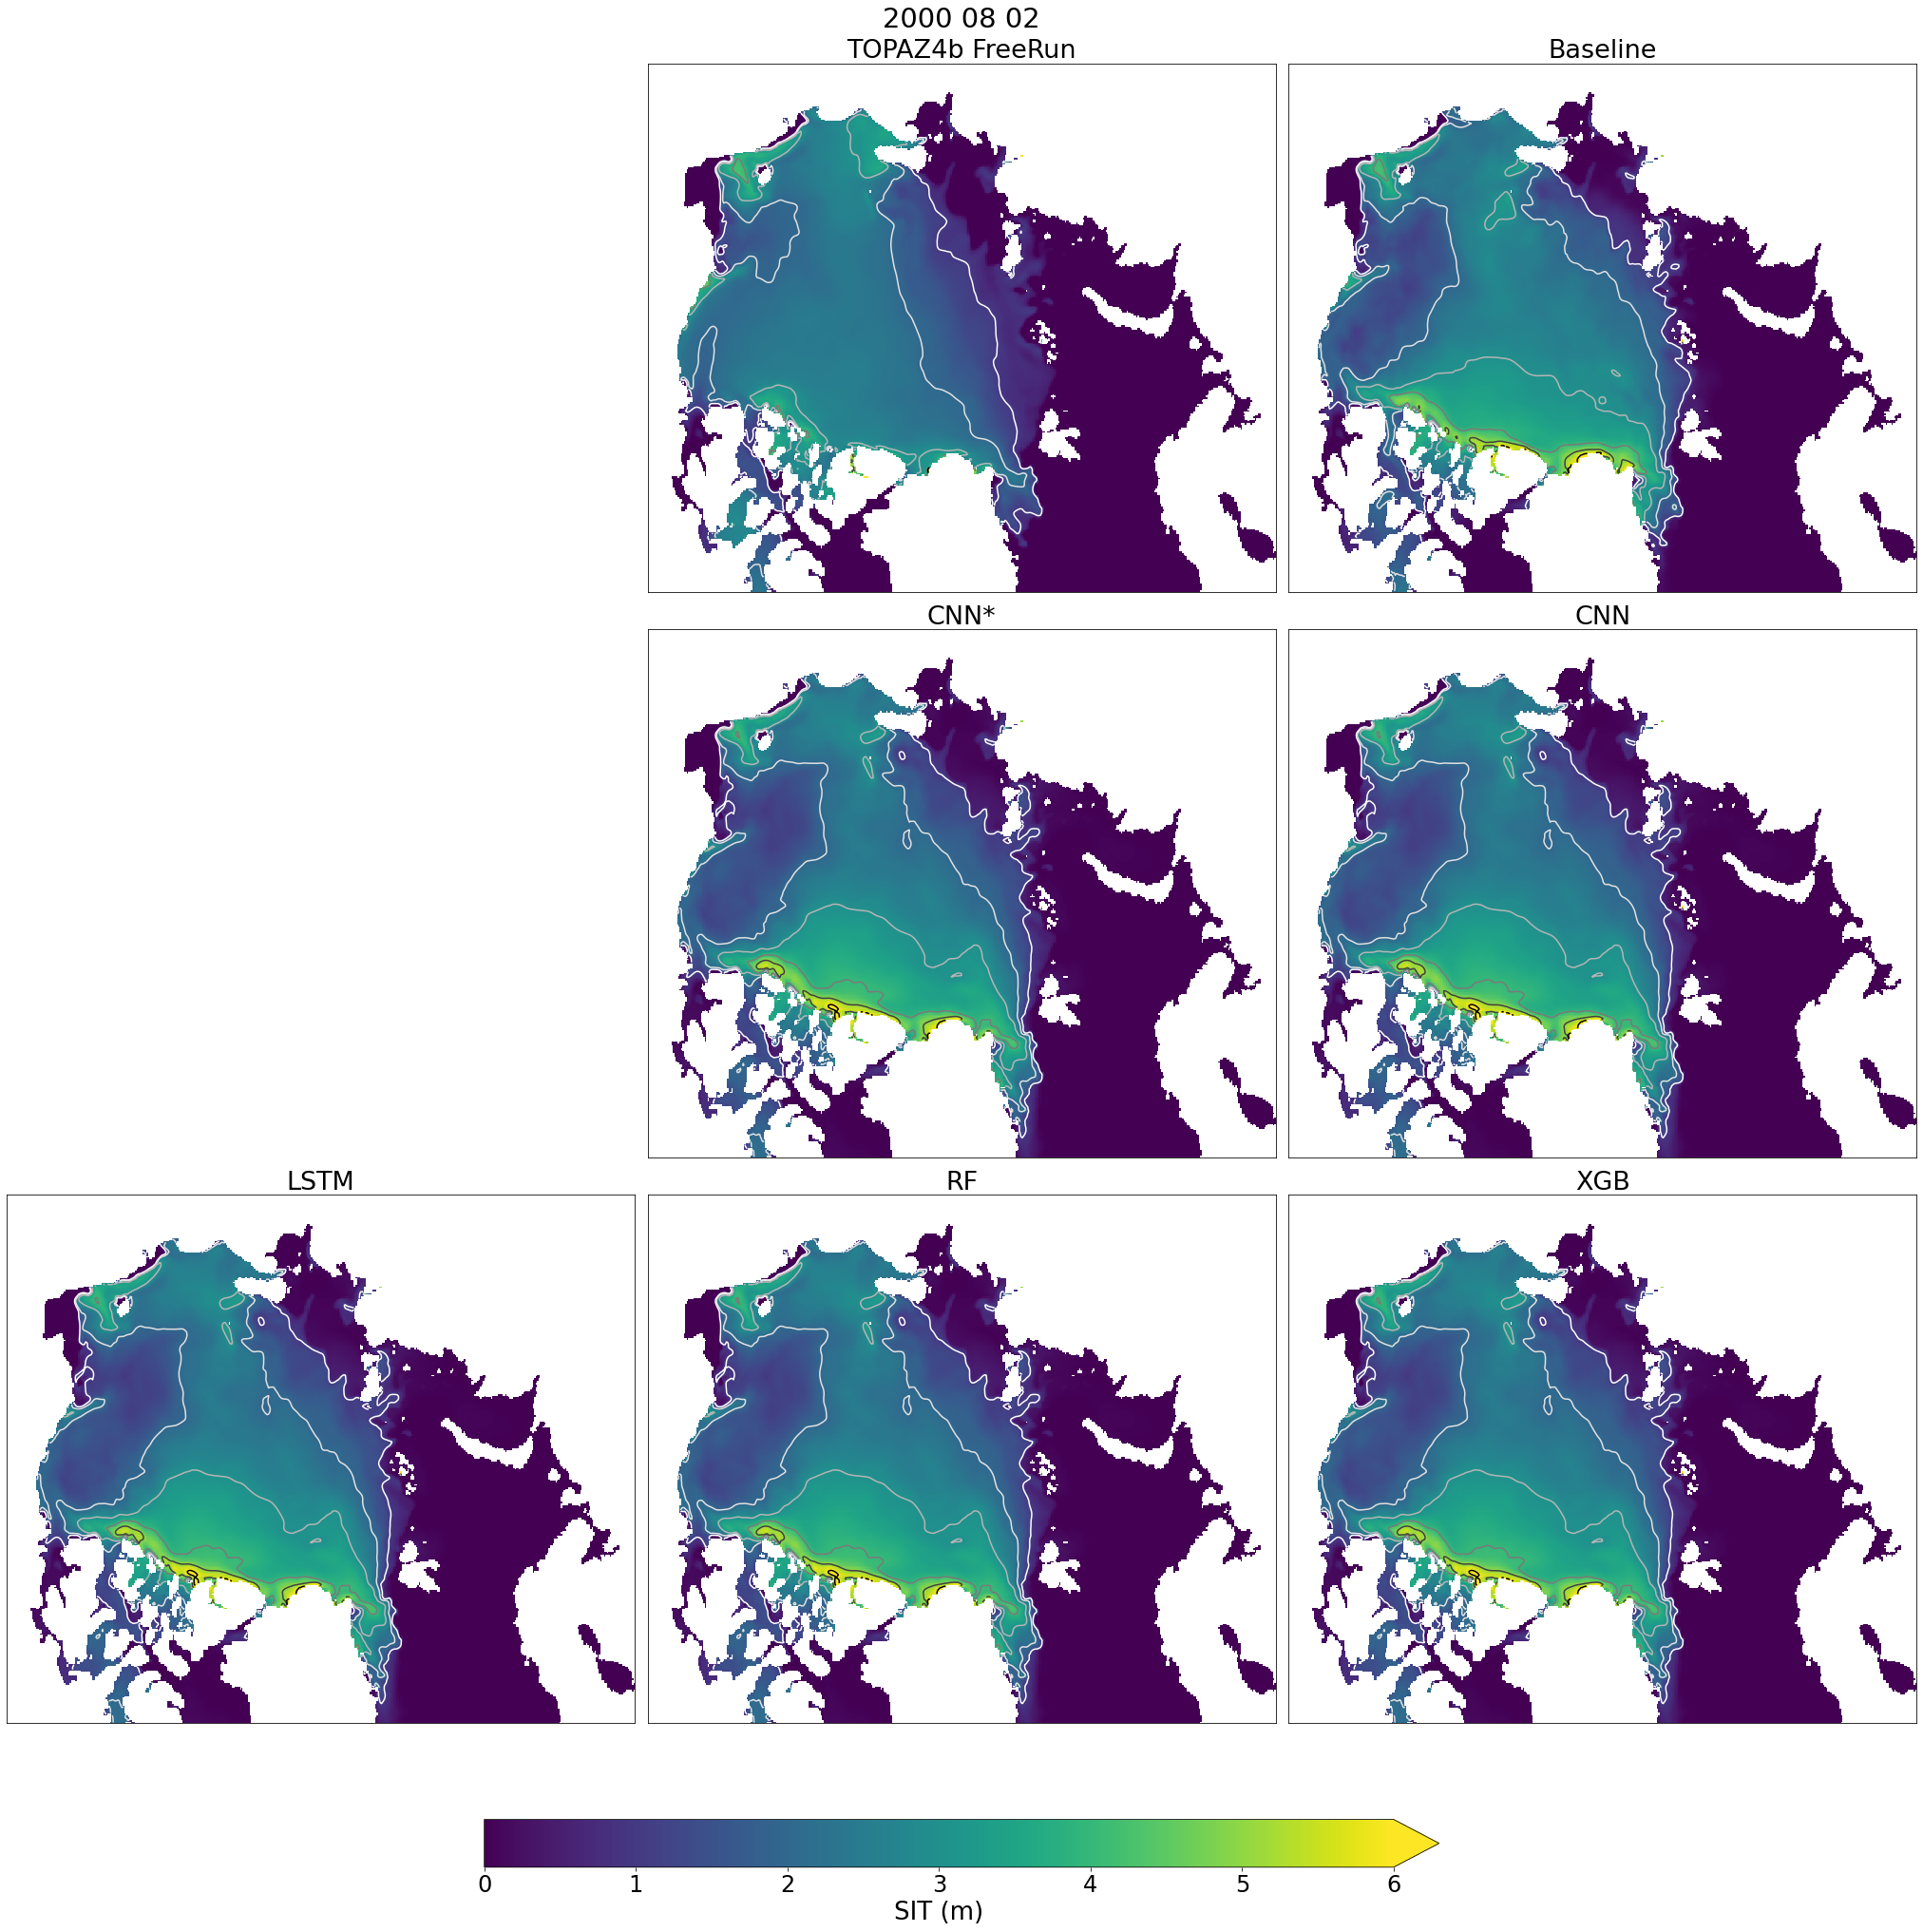

In [27]:
intercomp_sit.draw_spatial_reconstruct(models, datetime.datetime(2000, 8, 2), showfig=True, apply=True, vmax=6)

In [111]:
d1 = datetime.datetime(2000, 1, 1)
d2 = datetime.datetime(2011, 10, 1)

all_days = np.array([d1 + datetime.timedelta(days=x) for x in range((d2-d1).days + 1)])

In [115]:
reload(intercomp_sit)

<module 'src.visualization.intercomp_sit' from '/cluster/home/leoede/tardis/tardis-ml/src/visualization/intercomp_sit.py'>

In [ ]:
import pdb; pdb.set_trace()

In [ ]:
intercomp_sit.spat_reco_save_all(models, all_days, 
                                 rootdir=rootdir, fig_dir='Leo/results/application/', apply=True)

Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000101.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000102.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000103.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000104.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000105.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000106.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000107.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000108.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000109.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000110.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000111.png
Saved as : /cluster/w

Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000403.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000404.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000405.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000406.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000407.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000408.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000409.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000410.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000411.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000412.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000413.png
Saved as : /cluster/w

Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000705.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000706.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000707.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000708.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000709.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000710.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000711.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000712.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000713.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000714.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20000715.png
Saved as : /cluster/w

Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20001006.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20001007.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20001008.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20001009.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20001010.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20001011.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20001012.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20001013.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20001014.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20001015.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20001016.png
Saved as : /cluster/w

Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010107.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010108.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010109.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010110.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010111.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010112.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010113.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010114.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010115.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010116.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010117.png
Saved as : /cluster/w

Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010410.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010411.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010412.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010413.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010414.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010415.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010416.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010417.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010418.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010419.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010420.png
Saved as : /cluster/w

Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010712.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010713.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010714.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010715.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010716.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010717.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010718.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010719.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010720.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010721.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20010722.png
Saved as : /cluster/w

Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20011013.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20011014.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20011015.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20011016.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20011017.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20011018.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20011019.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20011020.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20011021.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20011022.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20011023.png
Saved as : /cluster/w

Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020114.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020115.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020116.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020117.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020118.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020119.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020120.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020121.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020122.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020123.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020124.png
Saved as : /cluster/w

Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020417.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020418.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020419.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020420.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020421.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020422.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020423.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020424.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020425.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020426.png
Saved as : /cluster/work/users/leoede/Leo/results/application/SIT_intercomp_20020427.png
Saved as : /cluster/w